In [1]:
import qutip
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import pickle
import time as time
import math, cmath
import sys
import auxiliary_library as me

from IPython.display import display, Math, Latex

Processing custom initial state
Processing default observable basis
sampling: 30
Closed evolution chosen
--- Exact evolution runtime: 136.4838354587555 seconds ---
Processing custom initial state
Processing default observable basis
sampling: 30
Closed evolution chosen
--- Projected evolution runtime: 143.80901193618774 seconds ---


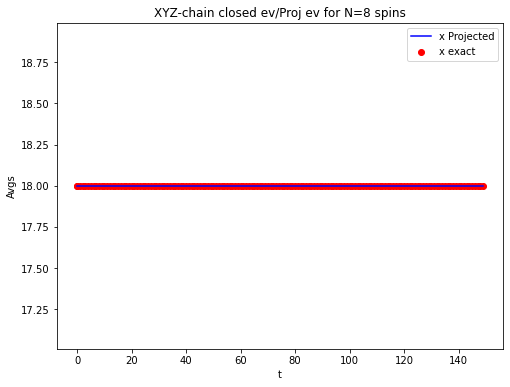

In [3]:
start_time = time.time()
chain_type = "XYZ" 
H_paras = [.15, .25, .1, 1.]
unitary_ev = True; gamma = None
size = 8; gaussian = False; gr = 2; xng = .7

spin_ops_list = me.one_body_spin_ops(size)
sx0sx1 = spin_ops_list[1][0] * spin_ops_list[1][1]
K = .5 * sx0sx1
rhoF = K.expm()
rhoF = rhoF/rhoF.tr()

title, ev_parasA, resultsA = me.spin_chain_ev(size = size, init_state = rhoF, chain_type = chain_type, Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 1, two_body_basis = True, 
                                unitary_ev = unitary_ev, gamma = gamma, gaussian = gaussian, gr = gr, xng = xng, 
                                              do_project = False)

print("--- Exact evolution runtime: %s seconds ---" % (time.time() - start_time))

ev_parasA["Exact ev. runtime"] = time.time() - start_time

start_time = time.time()

title, ev_parasB, resultsB = me.spin_chain_ev(size = size, init_state = rhoF, chain_type = chain_type, Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 1, two_body_basis = True,
                                unitary_ev = unitary_ev, gamma = gamma, gaussian = gaussian, gr = gr, xng = xng, 
                                              do_project = False)#

print("--- Projected evolution runtime: %s seconds ---" % (time.time() - start_time))

ev_parasB["Proj. ev. runtime"] = time.time() - start_time

plt.figure(figsize=(8, 6))
plt.plot(resultsA["ts"], resultsA["averages"][:,0], label="x Projected", color = "blue")
plt.scatter(resultsB["ts"], resultsB["averages"][:,0], label="x exact", color = "red")

plt.xlabel("t")
plt.ylabel("Avgs")

plt.title(title)
plt.legend()

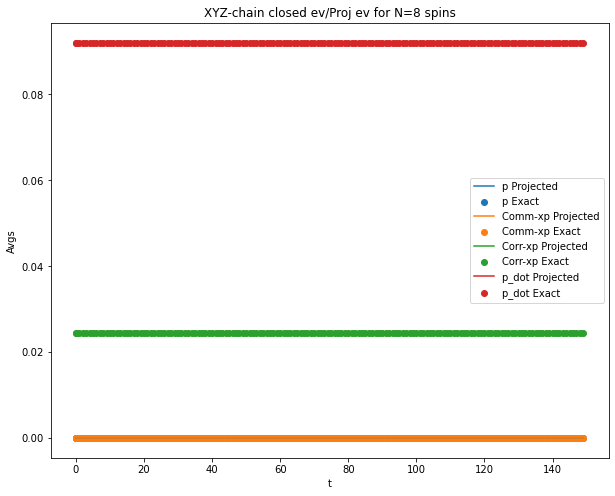

In [4]:
plot_labels = ["p ", "Comm-xp ", "Corr-xp ", "p_dot "]

plt.figure(figsize=(10, 8))
for n in range(4):
    plt.plot(resultsA["ts"], resultsA["averages"][:,n+1], label=plot_labels[n] + "Projected")
    plt.scatter(resultsB["ts"], resultsB["averages"][:,n+1], label=plot_labels[n] + "Exact")
    
plt.xlabel("t")
plt.ylabel("Avgs")
plt.title(title)
plt.legend()

In [ ]:
loc_globalid = qutip.tensor([qutip.qeye(2) for k in range(size)])
loc_globalid == me.one_body_spin_ops(size)[0][0]

In [ ]:
start_time = time.time()
chain_type = "XYZ"; H_paras = [.15, .25, .1, 1.];
unitary_ev = True; gamma = None;
size = 4; gaussian = False, gr = None; xng = None

In [ ]:
rho_at_t0 = resultsB["State ev"][0]
rho_at_t0

In [ ]:
rho_at_t0 = resultsB["State ev"][0]
#rho_at_t0.dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]]

rho_at_t0 = qutip.Qobj(rho_at_t0.reshape((16,16)), dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]])
rho_at_t0

In [ ]:
help(me.spin_chain_ev)

In [ ]:
resultsB["State ev"]